In [1]:
import os
import time
import cv2
import numpy as np
import matplotlib.pyplot as plt
from yolo_model import YOLO 
# This yolo_model contains A pretrained yolomodel

Using TensorFlow backend.


In [2]:
def process_image(img):
    """Resize, reduce and expand image.

    # Argument:
        img: original image.

    # Returns
        image: ndarray(64, 64, 3), processed image.
    """
    image = cv2.resize(img, (416, 416),
                       interpolation=cv2.INTER_CUBIC)
    image = np.array(image, dtype='float32')
    image /= 255.
    image = np.expand_dims(image, axis=0)

    return image

In [3]:
def get_classes(file):
    """Get classes name.

    # Argument:
        file: classes name for database.

    # Returns
        class_names: List, classes name.

    """
    with open(file) as f:
        class_names = f.readlines()
    class_names = [c.strip() for c in class_names]

    return class_names

In [4]:
def draw(image, boxes, scores, classes, all_classes):
    """Draw the boxes on the image.

    # Argument:
        image: original image.
        boxes: ndarray, boxes of objects.
        classes: ndarray, classes of objects.
        scores: ndarray, scores of objects.
        all_classes: all classes name.
    """
    for box, score, cl in zip(boxes, scores, classes):
        x, y, w, h = box

        top = max(0, np.floor(x + 0.5).astype(int))
        left = max(0, np.floor(y + 0.5).astype(int))
        right = min(image.shape[1], np.floor(x + w + 0.5).astype(int))
        bottom = min(image.shape[0], np.floor(y + h + 0.5).astype(int))

        cv2.rectangle(image, (top, left), (right, bottom), (255, 0, 0), 2)
        cv2.putText(image, '{0} {1:.2f}'.format(all_classes[cl], score),
                    (top, left - 6),
                    cv2.FONT_HERSHEY_SIMPLEX,
                    0.6, (0, 0, 255), 1,
                    cv2.LINE_AA)

        print('class: {0}, score: {1:.2f}'.format(all_classes[cl], score))
        print('box coordinate x,y,w,h: {0}'.format(box))

    print()

In [5]:
def detect_image(image, yolo, all_classes):
    """Use yolo v3 to detect images.

    # Argument:
        image: original image.
        yolo: YOLO, yolo model.
        all_classes: all classes name.

    # Returns:
        image: processed image.
    """
    pimage = process_image(image)

    start = time.time()
    boxes, classes, scores = yolo.predict(pimage, image.shape)
    end = time.time()

    print('time: {0:.2f}s'.format(end - start))

    if boxes is not None:
        draw(image, boxes, scores, classes, all_classes)

    return image

In [6]:
def detect_video(video, yolo, all_classes):
    """Use yolo v3 to detect video.

    # Argument:
        video: video file.
        yolo: YOLO, yolo model.
        all_classes: all classes name.
    """
    # video_path = os.path.join("videos", "test", video)
    video_path = 0
    camera = cv2.VideoCapture(video_path)
    cv2.namedWindow("detection", cv2.WINDOW_AUTOSIZE)

    # Prepare for saving the detected video
    sz = (int(camera.get(cv2.CAP_PROP_FRAME_WIDTH)),
        int(camera.get(cv2.CAP_PROP_FRAME_HEIGHT)))
    # fourcc = cv2.VideoWriter_fourcc(*'mpeg')

    
    # vout = cv2.VideoWriter()
    # vout.open(os.path.join("videos", "res", video), fourcc, 20, sz, True)

    while True:
        res, frame = camera.read()

        if not res:
            break
        
        image = detect_image(frame, yolo, all_classes)
        cv2.imshow("detection", image)
        
        # Save the video frame by frame
        # vout.write(image)

        if cv2.waitKey(1) & 0xff == 27:
                break

    # vout.release()
    camera.release()
    

In [7]:
yolo = YOLO(0.6, 0.5)
all_classes = get_classes('data/coco_classes.txt')

C:\Users\anuj4\AppData\Local\conda\conda\envs\TF\lib\site-packages\keras\engine\saving.py:341: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '


time: 4.23s
class: person, score: 1.00
box coordinate x,y,w,h: [187.67944336  83.12436104  91.77330017 306.58684635]
class: horse, score: 1.00
box coordinate x,y,w,h: [396.46743774 137.31078506 215.66379547 208.48716593]
class: dog, score: 1.00
box coordinate x,y,w,h: [ 61.278615   263.36980581 145.181036    88.42913878]



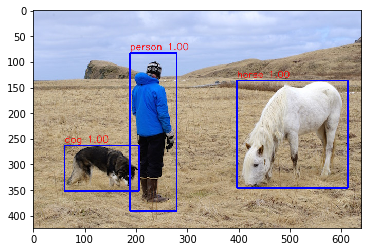

time: 0.82s
class: person, score: 1.00
box coordinate x,y,w,h: [ 26.53663874  56.48031098 394.98388767 542.99493706]



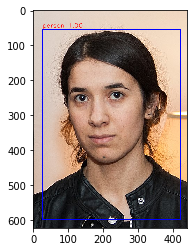

In [8]:
for f in os.listdir('images/'):
    path = 'images/' + f
    image = cv2.imread(path)
    image = detect_image(image, yolo, all_classes)
    image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
    plt.imshow(image)
    plt.show()

In [8]:
detect_video(0, yolo, all_classes)

time: 4.32s
class: person, score: 0.95
box coordinate x,y,w,h: [ 20.31217575  85.37109375 383.21376801 334.41112518]

time: 0.86s
class: person, score: 1.00
box coordinate x,y,w,h: [  3.58745575  67.23213673 420.0459671  345.13260841]

time: 0.82s
class: person, score: 1.00
box coordinate x,y,w,h: [  3.13541412  68.99291039 420.14919281 344.28405762]

time: 0.82s
class: person, score: 1.00
box coordinate x,y,w,h: [  7.67122269  58.6782217  415.69633484 362.68315315]

time: 0.83s
class: person, score: 0.75
box coordinate x,y,w,h: [  5.70118904  77.9117775  299.54862595 326.12056732]

time: 0.84s
class: person, score: 0.98
box coordinate x,y,w,h: [ -2.70868301  63.69735718 232.88461685 359.40341949]

time: 0.84s
class: person, score: 0.94
box coordinate x,y,w,h: [ -3.77630234  58.90910625 230.66490173 360.57772636]

time: 0.84s
class: person, score: 0.84
box coordinate x,y,w,h: [ -4.10346031  67.19232559 240.17150879 343.1440258 ]

time: 0.84s
class: person, score: 0.79
box coordinate x,